#IMDb top 1000 films Web Scraping Project

#Importing packages

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import pandas as pd

#Creating IMDb Web Scraper function

In [3]:
def IMDb_web_scraper(url, df):
  base_site = url
  response = requests.get(base_site)
  html = response.content
  soup = BeautifulSoup(html, 'lxml')

  divs = soup.find_all('div', {'class':'lister-item-content'})
  headings = [div.find("h3") for div in divs]

  movie_names = [heading.find('a').string for heading in headings]

  years = [year.find('span', class_ = 'lister-item-year text-muted unbold').string for year in headings]
  years = [year.strip('I () TV MovieSpecial') for year in years]
  years = [int(year.split('–')[0]) if '–' in year else int(year) for year in years]

  arrtg = [div.find("p") for div in divs]
  age_ratings = [None if ar.find('span', class_ = 'certificate') is None else ar.find('span', class_ = 'certificate').string for ar in arrtg]
  runtime_mins = [rt.find('span', class_ = 'runtime').string for rt in arrtg]
  runtime_mins = [rt.strip('min ') for rt in runtime_mins]
  runtime_mins = [int(rt) for rt in runtime_mins]

  genres = [None if g.find('span', class_ = 'genre') is None else g.find('span', class_ = 'genre').string for g in arrtg]
  genres = [None if g is None else g.strip('\n ') for g in genres]

  ratings = [div.find("span", class_ = 'ipl-rating-star__rating').string for div in divs]
  IMDb_rating = [float(r) for r in ratings]

  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')
    if g.find('span', text='Gross:') else None
    for g in divs]
  gross_values = [None if g is None else int(g) for g in gross_values]
  gross_values = [None if g is None else round(g / 1000000, 2) for g in gross_values]


  df["Movie Title"] = movie_names
  df["Year"] = years
  df["Age Rating"] = age_ratings
  df["Runtime mins"] = runtime_mins
  df["Genres"] = genres
  df["IMDb Rating"] = IMDb_rating
  df["Gross Profit Millions"] = gross_values

#Scraping top 1000 films on IMDb

Top 100 films

In [4]:
top_100_films = pd.DataFrame()

In [5]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=1', top_100_films)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [6]:
top_100_films.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,The Shawshank Redemption,1994,R,142,Drama,9.3,28.34
1,The Godfather,1972,R,175,"Crime, Drama",9.2,134.97
2,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,534.86
3,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,96.90
4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,377.85


films 101-200

In [7]:
films_101_200 = pd.DataFrame()

In [8]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=2', films_101_200)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [9]:
films_101_200.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,Bicycle Thieves,1948,Not Rated,89,Drama,8.3,0.33
1,Children of Paradise,1945,Not Rated,189,"Drama, Romance",8.3,NaN
2,To Live,1994,Not Rated,133,"Drama, War",8.3,2.33
3,Man with a Movie Camera,1929,Not Rated,68,Documentary,8.3,NaN
4,The Cranes Are Flying,1957,Not Rated,95,"Drama, Romance, War",8.3,0.02


films 201-300

In [10]:
films_201_300 = pd.DataFrame()

In [11]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=3', films_201_300)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [12]:
films_201_300.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,Before Sunset,2004,R,80,"Drama, Romance",8.1,5.82
1,The Man Who Shot Liberty Valance,1962,Approved,123,"Drama, Western",8.1,NaN
2,Persona,1966,Not Rated,83,"Drama, Thriller",8.1,NaN
3,On the Waterfront,1954,Approved,108,"Crime, Drama, Thriller",8.1,9.60
4,The Bridge on the River Kwai,1957,PG,161,"Adventure, Drama, War",8.1,44.91


films 301-400

In [13]:
films_301_400 = pd.DataFrame()

In [14]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=4', films_301_400)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [15]:
films_301_400.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,Brief Encounter,1945,Not Rated,86,"Drama, Romance",8.0,NaN
1,Touch of Evil,1958,PG-13,95,"Crime, Drama, Film-Noir",8.0,2.24
2,Mirror,1975,Not Rated,107,"Biography, Drama",8.0,0.18
3,The Unknown Soldier,1955,None,177,"Drama, War",8.0,NaN
4,Anatomy of a Murder,1959,Not Rated,161,"Drama, Mystery",8.0,11.90


films 401-500

In [16]:
films_401_500 = pd.DataFrame()

In [17]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=5', films_401_500)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [18]:
films_401_500.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,Talk to Her,2002,R,112,"Drama, Mystery, Romance",7.9,9.36
1,Angels with Dirty Faces,1938,Passed,97,"Crime, Drama, Film-Noir",7.9,NaN
2,Three Colors: Blue,1993,R,94,"Drama, Music, Mystery",7.9,1.32
3,The Big Heat,1953,Passed,89,"Crime, Film-Noir, Thriller",7.9,NaN
4,Amour,2012,PG-13,127,Drama,7.9,6.74


films 501-600

In [19]:
films_501_600 = pd.DataFrame()

In [20]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=6', films_501_600)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [21]:
films_501_600.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,All About My Mother,1999,R,101,"Comedy, Drama, Romance",7.8,8.26
1,The Man Who Would Be King,1975,PG,129,"Adventure, War",7.8,NaN
2,The Umbrellas of Cherbourg,1964,Not Rated,91,"Drama, Musical, Romance",7.8,0.03
3,Babette's Feast,1987,G,103,Drama,7.8,4.40
4,Cléo from 5 to 7,1962,Not Rated,90,"Comedy, Drama, Music",7.8,NaN


films 601-700

In [22]:
films_601_700 = pd.DataFrame()

In [23]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=7', films_601_700)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [24]:
films_601_700.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,Key Largo,1948,Approved,100,"Action, Crime, Drama",7.7,NaN
1,The Salesman,2016,PG-13,124,"Drama, Thriller",7.7,2.40
2,Stroszek,1977,Not Rated,115,"Comedy, Drama",7.7,NaN
3,Fireworks,1997,None,103,"Crime, Drama, Romance",7.7,0.23
4,The Marriage of Maria Braun,1979,R,120,Drama,7.7,NaN


films 701-800

In [25]:
films_701_800 = pd.DataFrame()

In [26]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=8', films_701_800)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [27]:
films_701_800.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,Pickpocket,1959,Not Rated,76,"Crime, Drama",7.6,NaN
1,Ju Dou,1990,PG-13,95,"Drama, Romance",7.6,1.99
2,The Gospel According to St. Matthew,1964,Not Rated,137,"Biography, Drama, History",7.6,NaN
3,Insiang,1976,TV-14,95,Drama,7.6,NaN
4,Pina,2011,PG,103,"Documentary, Music",7.6,3.52


films 801-900

In [28]:
films_801_900 = pd.DataFrame()

In [29]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=9', films_801_900)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [30]:
films_801_900.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,Cairo Station,1958,Not Rated,77,"Crime, Drama",7.5,NaN
1,The Scarlet Empress,1934,Passed,104,"Drama, History, Romance",7.5,NaN
2,Love Me Tonight,1932,Passed,104,"Comedy, Musical, Romance",7.5,NaN
3,Went the Day Well?,1942,Approved,92,"Thriller, War",7.5,0.02
4,Sons of the Desert,1933,Passed,68,"Comedy, Family",7.5,NaN


films 901-1000

In [31]:
films_901_1000 = pd.DataFrame()

In [32]:
IMDb_web_scraper('https://www.imdb.com/list/ls048276758/?sort=user_rating,desc&st_dt=&mode=detail&page=10', films_901_1000)

<ipython-input-3-671cd525c022>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if g.find('span', text='Gross:') else None
<ipython-input-3-671cd525c022>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_values = [g.find('span', text='Gross:').find_next_sibling('span', {'name': 'nv'})['data-value'].replace(',', '')


In [33]:
films_901_1000.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
0,The Tall T,1957,Approved,78,Western,7.3,NaN
1,Shanghai Express,1932,Approved,82,"Adventure, Drama, Film-Noir",7.3,NaN
2,Monsieur Hulot's Holiday,1953,Not Rated,83,Comedy,7.3,NaN
3,Graduation,2016,R,128,"Crime, Drama",7.3,0.18
4,A New Leaf,1971,G,102,"Comedy, Romance",7.3,NaN


#Combining Dataframes

In [34]:
top_1000_films = pd.concat([top_100_films, films_101_200, films_201_300, films_301_400, films_401_500, films_501_600,
                            films_601_700, films_701_800, films_801_900, films_901_1000], ignore_index=True)

In [35]:
top_1000_films.tail()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions
995,Hard to Be a God,2013,Not Rated,177,"Drama, Sci-Fi",6.6,NaN
996,David Holzman's Diary,1967,Not Rated,74,"Comedy, Drama",6.5,NaN
997,The Wandering Soap Opera,2017,None,80,"Comedy, Drama, Fantasy",6.5,0.0
998,Gavagai,2016,None,90,Drama,6.5,NaN
999,The Big Sleep,1978,R,99,"Crime, Drama, Mystery",5.7,NaN


#Data Cleaning

Checking nulls - when analysing age rating and profit, will make new df with nulls removed

In [36]:
top_1000_films.isnull().sum()

Movie Title                0
Year                       0
Age Rating                63
Runtime mins               0
Genres                     1
IMDb Rating                0
Gross Profit Millions    424
dtype: int64

Checking datatypes

In [37]:
top_1000_films.dtypes

Movie Title               object
Year                       int64
Age Rating                object
Runtime mins               int64
Genres                    object
IMDb Rating              float64
Gross Profit Millions    float64
dtype: object

Adding in inflation column for gross profit

In [38]:
# Convert 'Year' column to datetime format
top_1000_films['Year'] = pd.to_datetime(top_1000_films['Year'], format='%Y')

# Read the CPI data
cpi_data = pd.read_csv('CPIAUCNS (1).csv', parse_dates=['DATE'])
cpi_data.rename(columns={'DATE': 'Year', 'CPIAUCNS': 'CPI'}, inplace=True)

# Merge the CPI data with the movie dataset based on the year
top_1000_films = pd.merge(top_1000_films, cpi_data, how='left', on='Year')

# Assuming 'Gross Profit' is the column you want to adjust
# Calculate the inflation factor for each movie based on its release year - 307.671 is CPI for October 2023
top_1000_films['Inflation Factor'] = 307.671 / top_1000_films['CPI']

# Adjust the gross profit for inflation to today's money
top_1000_films['Adjusted Gross Profit'] = round(top_1000_films['Gross Profit Millions'] * top_1000_films['Inflation Factor'], 2)

In [39]:
top_1000_films.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,CPI,Inflation Factor,Adjusted Gross Profit
0,The Shawshank Redemption,1994-01-01,R,142,Drama,9.3,28.34,146.20,2.104453,59.64
1,The Godfather,1972-01-01,R,175,"Crime, Drama",9.2,134.97,41.10,7.485912,1010.37
2,The Dark Knight,2008-01-01,PG-13,152,"Action, Crime, Drama",9.0,534.86,211.08,1.457604,779.61
3,Schindler's List,1993-01-01,R,195,"Biography, Drama, History",9.0,96.90,142.60,2.157581,209.07
4,The Lord of the Rings: The Return of the King,2003-01-01,PG-13,201,"Action, Adventure, Drama",9.0,377.85,181.70,1.693291,639.81


Re-cleaning dataframe after adding adjusted profit column

In [40]:
top_1000_films['Year'] = top_1000_films['Year'].dt.year
top_1000_films.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,CPI,Inflation Factor,Adjusted Gross Profit
0,The Shawshank Redemption,1994,R,142,Drama,9.3,28.34,146.20,2.104453,59.64
1,The Godfather,1972,R,175,"Crime, Drama",9.2,134.97,41.10,7.485912,1010.37
2,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,534.86,211.08,1.457604,779.61
3,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,96.90,142.60,2.157581,209.07
4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,377.85,181.70,1.693291,639.81


In [41]:
top_1000_films = top_1000_films.drop(columns=['CPI', 'Inflation Factor'], axis=1)

In [42]:
top_1000_films.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit
0,The Shawshank Redemption,1994,R,142,Drama,9.3,28.34,59.64
1,The Godfather,1972,R,175,"Crime, Drama",9.2,134.97,1010.37
2,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,534.86,779.61
3,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,96.90,209.07
4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,377.85,639.81


Creating decades column

In [43]:
top_1000_films['Decade'] = (top_1000_films['Year'] // 10) * 10
top_1000_films

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit,Decade
0,The Shawshank Redemption,1994,R,142,Drama,9.3,28.34,59.64,1990
1,The Godfather,1972,R,175,"Crime, Drama",9.2,134.97,1010.37,1970
2,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,534.86,779.61,2000
3,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,96.90,209.07,1990
4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,377.85,639.81,2000
...,...,...,...,...,...,...,...,...,...
995,Hard to Be a God,2013,Not Rated,177,"Drama, Sci-Fi",6.6,NaN,NaN,2010
996,David Holzman's Diary,1967,Not Rated,74,"Comedy, Drama",6.5,NaN,NaN,1960
997,The Wandering Soap Opera,2017,None,80,"Comedy, Drama, Fantasy",6.5,0.00,0.00,2010
998,Gavagai,2016,None,90,Drama,6.5,NaN,NaN,2010


Checking distributions

Year

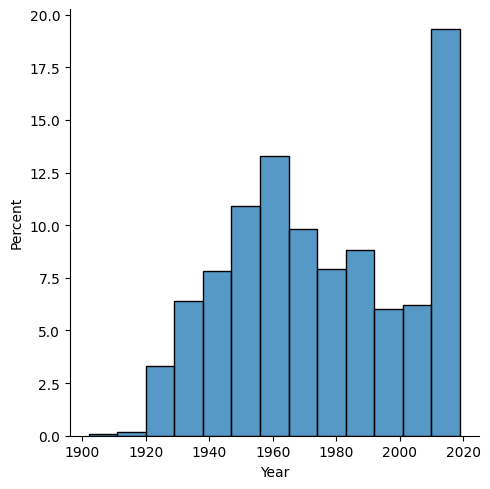

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(x = top_1000_films['Year'], stat='percent')

plt.show()

Age Rating

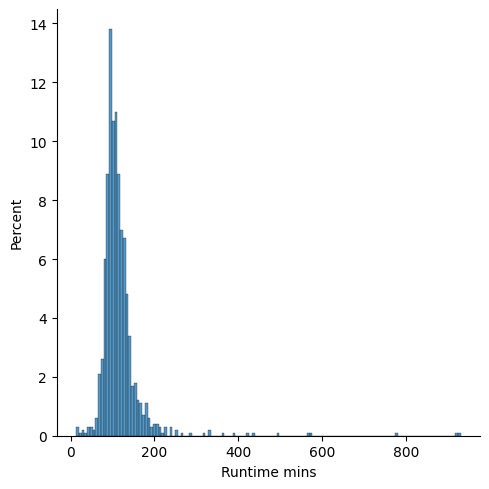

In [45]:
sns.displot(x = top_1000_films['Runtime mins'], stat='percent')

plt.show()

Adjusted gross profit

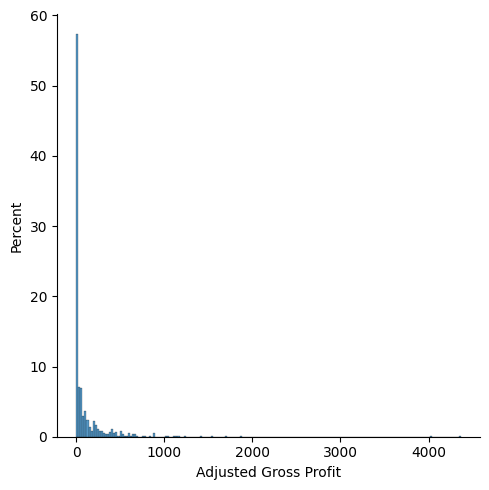

In [46]:
sns.displot(x = top_1000_films['Adjusted Gross Profit'], stat='percent')

plt.show()

Creating dataframes for profit and age rating that dismisses nulls

Age Rating df

In [47]:
age_rating_df = top_1000_films.dropna(subset=['Age Rating'])
age_rating_df.isnull().sum()

Movie Title                0
Year                       0
Age Rating                 0
Runtime mins               0
Genres                     0
IMDb Rating                0
Gross Profit Millions    371
Adjusted Gross Profit    371
Decade                     0
dtype: int64

Profit df

In [48]:
profit_df = top_1000_films.dropna(subset=['Adjusted Gross Profit'])
profit_df.isnull().sum()

Movie Title               0
Year                      0
Age Rating               10
Runtime mins              0
Genres                    0
IMDb Rating               0
Gross Profit Millions     0
Adjusted Gross Profit     0
Decade                    0
dtype: int64

#Data Analysis

#Highest IMDb rating for films by Year

In [49]:
year_ratings = top_1000_films.groupby('Year')[['IMDb Rating']].mean().round(2).sort_values('IMDb Rating', ascending=False)
year_ratings['Count'] = top_1000_films['Year'].value_counts()
year_ratings = year_ratings[year_ratings['Count'] > 2]
year_ratings.reset_index(inplace=True)
year_ratings['Rank'] = year_ratings.index + 1
year_ratings = year_ratings[['Rank', 'Year', 'Count', 'IMDb Rating']]
year_ratings.head(10)

,Rank,Year,Count,IMDb Rating
0,1,2001,5,8.24
1,2,1994,11,8.22
2,3,1998,3,8.20
3,4,1995,6,8.17
4,5,2004,4,8.15
5,6,1984,12,8.12
6,7,2002,8,8.10
7,8,2006,5,8.08
8,9,2003,9,8.06
9,10,1991,9,8.04


#Highest IMDb rating for films by Decade

In [50]:
decade_ratings = top_1000_films.groupby('Decade')[['IMDb Rating']].mean().round(2).sort_values('IMDb Rating', ascending=False)
decade_ratings['Count'] = top_1000_films['Decade'].value_counts()
decade_ratings = decade_ratings[decade_ratings['Count'] > 2]
decade_ratings.reset_index(inplace=True)
decade_ratings['Rank'] = decade_ratings.index + 1
decade_ratings = decade_ratings[['Rank', 'Decade', 'Count', 'IMDb Rating']]
decade_ratings

,Rank,Decade,Count,IMDb Rating
0,1,2000,72,8.02
1,2,1990,66,7.98
2,3,1920,37,7.91
3,4,1980,89,7.87
4,5,1950,127,7.85
5,6,1960,136,7.84
6,7,1970,104,7.82
7,8,1940,94,7.74
8,9,1930,79,7.68
9,10,2010,193,7.65


#How had IMDb rating changed over time

In [51]:
year_ratings = year_ratings.sort_values('Year')

In [52]:
year_ratings['SMA IMDb Rating'] = year_ratings['IMDb Rating'].rolling(5).mean()
year_ratings

,Rank,Year,Count,IMDb Rating,SMA IMDb Rating
21,22,1924,4,7.95,NaN
52,53,1925,6,7.80,NaN
16,17,1927,5,7.98,NaN
35,36,1928,9,7.88,NaN
36,37,1929,4,7.88,7.898
...,...,...,...,...,...
87,88,2015,23,7.59,7.710
79,80,2016,25,7.64,7.694
90,91,2017,29,7.54,7.628
89,90,2018,29,7.55,7.616


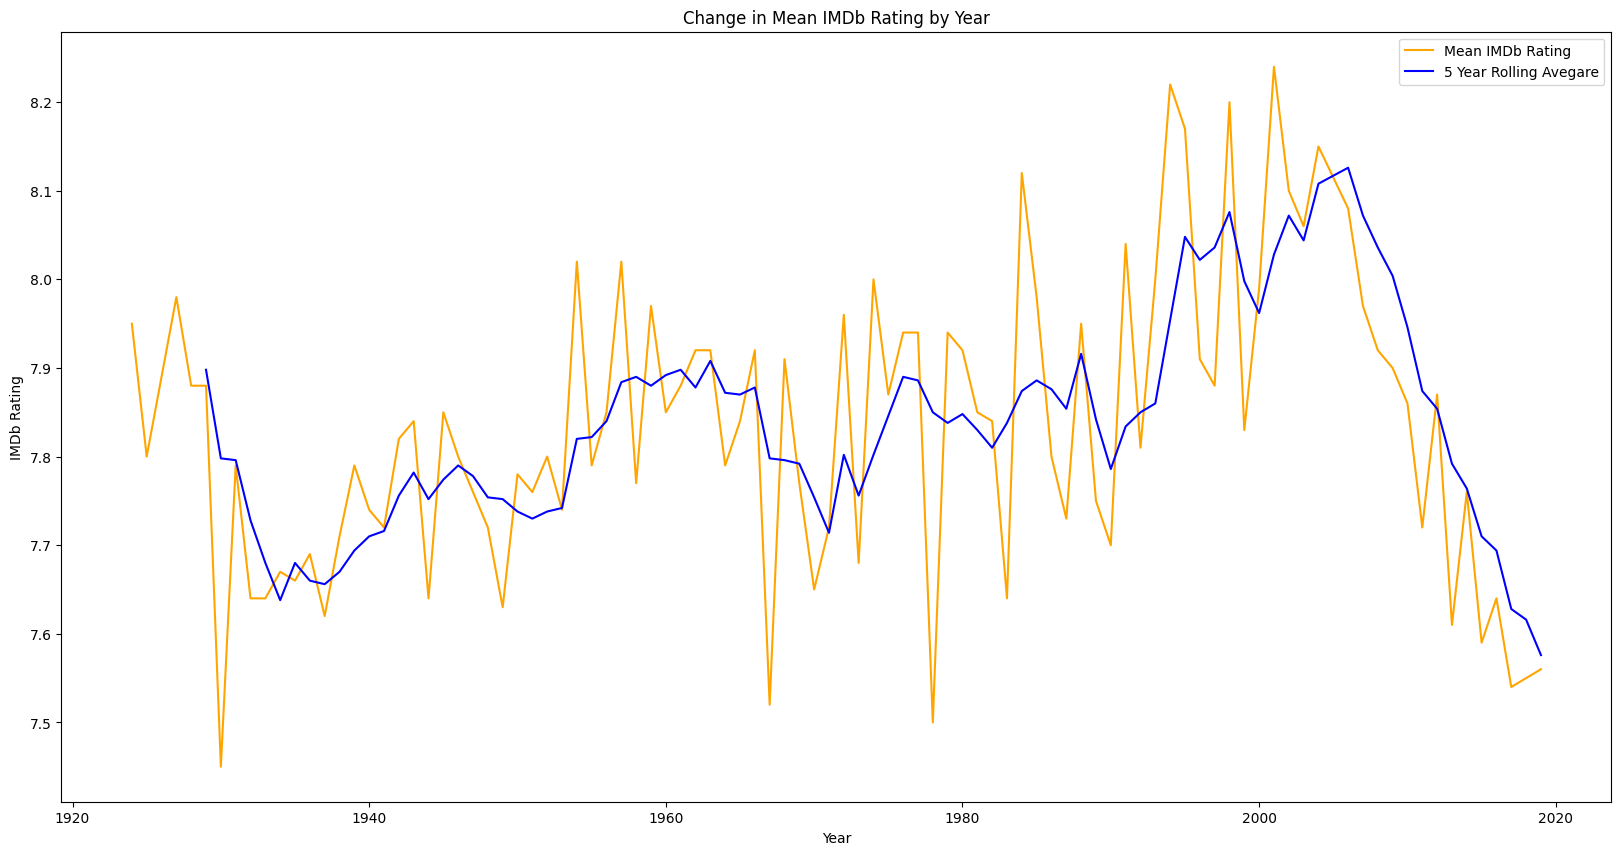

In [53]:
plt.rcParams["figure.figsize"] = (20, 10)

plt.plot(year_ratings.Year, year_ratings['IMDb Rating'], label = "Mean IMDb Rating", color = 'orange')
plt.plot(year_ratings.Year, year_ratings['SMA IMDb Rating'], label = "5 Year Rolling Avegare", color = 'blue')

plt.xlabel('Year')
plt.ylabel('IMDb Rating')

plt.title("Change in Mean IMDb Rating by Year")
plt.legend()
plt.show()

#Is there a correlation between gross profit and IMDb rating

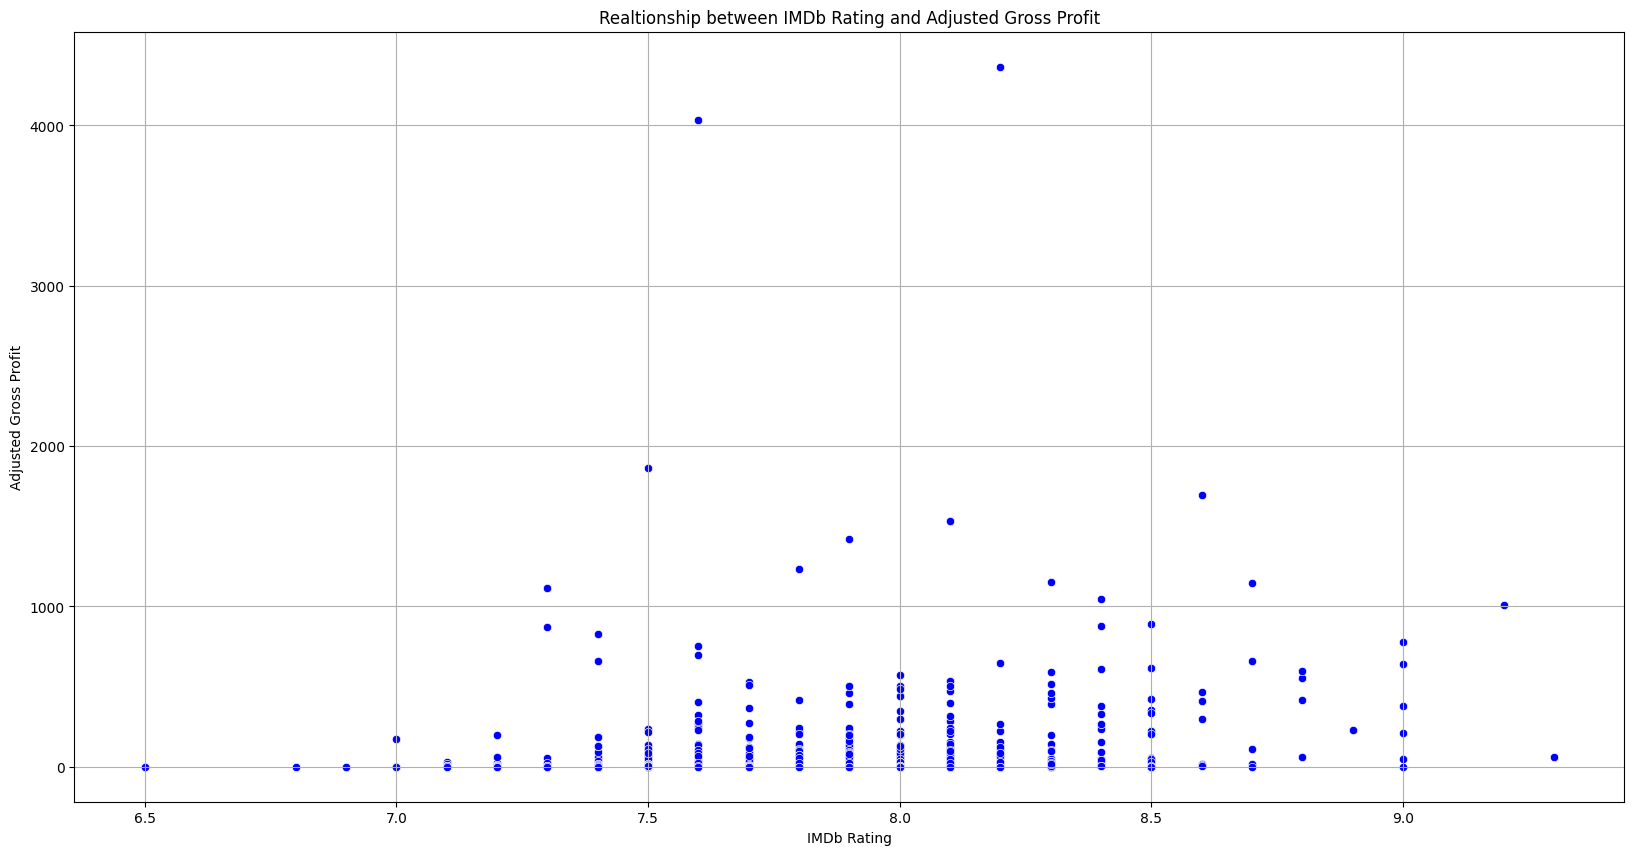

In [54]:
sns.scatterplot(y=profit_df['Adjusted Gross Profit'], x=profit_df['IMDb Rating'], color='blue', marker='o')
plt.title('Realtionship between IMDb Rating and Adjusted Gross Profit')
plt.ylabel('Adjusted Gross Profit')
plt.xlabel('IMDb Rating')
plt.grid(True)
plt.show()

Removing two outliers

In [55]:
profit_df.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit,Decade
0,The Shawshank Redemption,1994,R,142,Drama,9.3,28.34,59.64,1990
1,The Godfather,1972,R,175,"Crime, Drama",9.2,134.97,1010.37,1970
2,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,534.86,779.61,2000
3,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,96.90,209.07,1990
4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,377.85,639.81,2000


In [56]:
profit_df = profit_df.sort_values(by='Adjusted Gross Profit', ascending=False)
profit_df.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit,Decade
119,Gone with the Wind,1939,Passed,238,"Drama, Romance, War",8.2,198.68,4366.29,1930
661,Snow White and the Seven Dwarfs,1937,Approved,83,"Animation, Adventure, Family",7.6,184.93,4035.29,1930
759,Pinocchio,1940,G,88,"Animation, Adventure, Comedy",7.5,84.25,1864.84,1940
23,Star Wars: Episode IV - A New Hope,1977,PG,121,"Action, Adventure, Fantasy",8.6,322.74,1697.40,1970
182,Jaws,1975,PG,124,"Adventure, Mystery, Thriller",8.1,260.00,1535.40,1970


In [57]:
profit_df_no_outliers = profit_df.drop([121,663])

Checking correlation without outliers

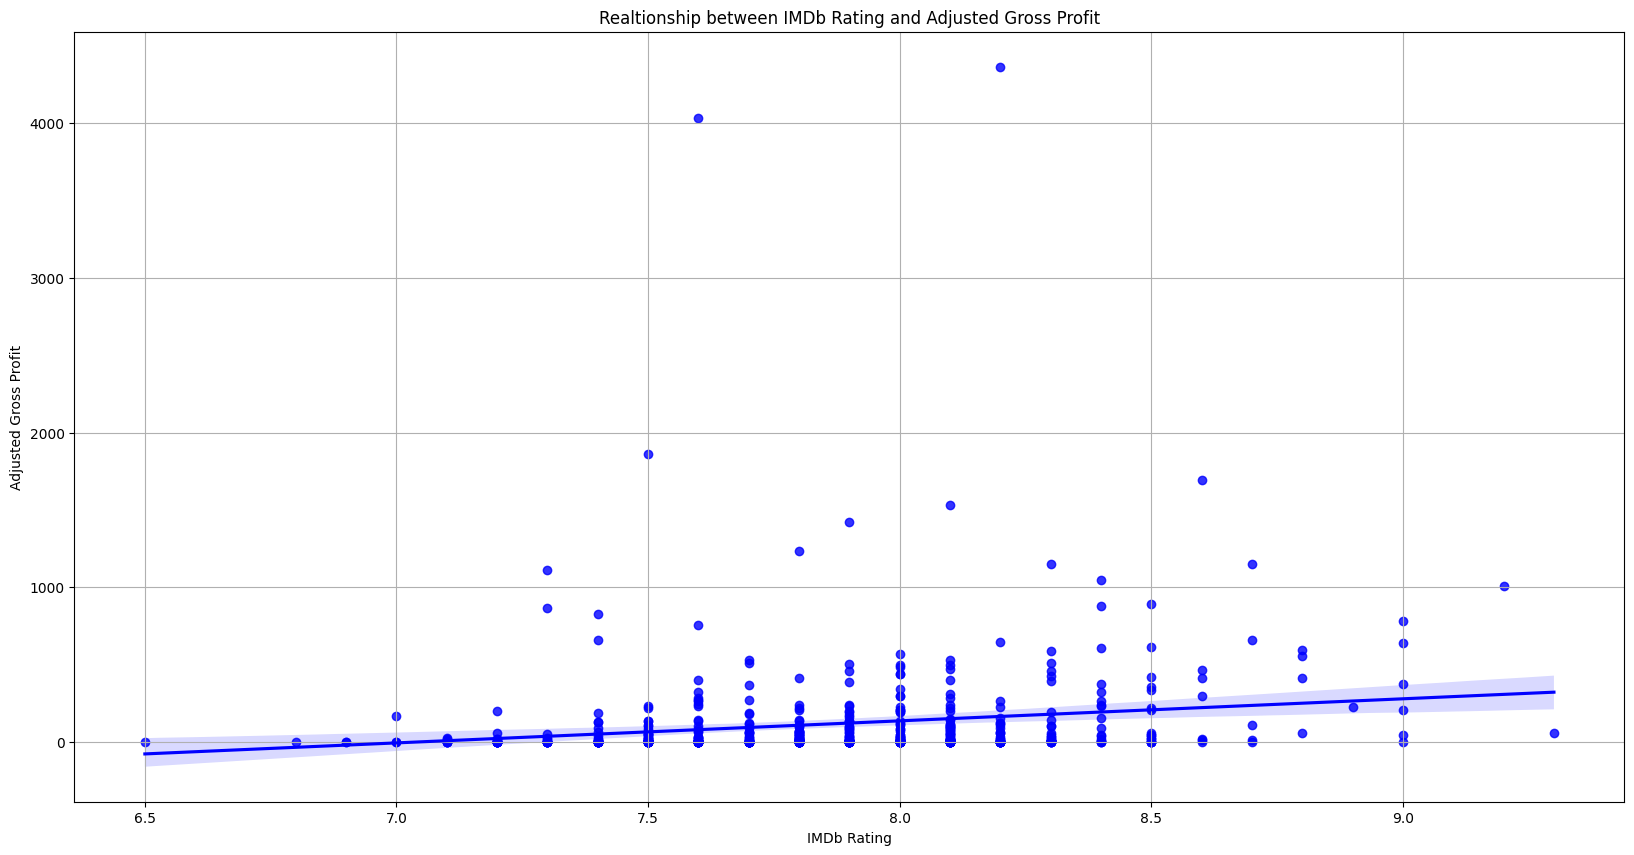

In [58]:
sns.regplot(data=profit_df_no_outliers, y=profit_df_no_outliers['Adjusted Gross Profit'], x=profit_df_no_outliers['IMDb Rating'], color='blue', marker='o')
plt.title('Realtionship between IMDb Rating and Adjusted Gross Profit')
plt.ylabel('Adjusted Gross Profit')
plt.xlabel('IMDb Rating')
plt.grid(True)
plt.show()

Correlation Coefficients

In [59]:
selected_columns = ['Adjusted Gross Profit', 'IMDb Rating']
profit_df_no_outliers[selected_columns].corr()

,Adjusted Gross Profit,IMDb Rating
Adjusted Gross Profit,1.000000,0.172729
IMDb Rating,0.172729,1.000000


# Relationship between Runtime and Gross Profit/IMDb Rating

#Runtime and Gross Profit

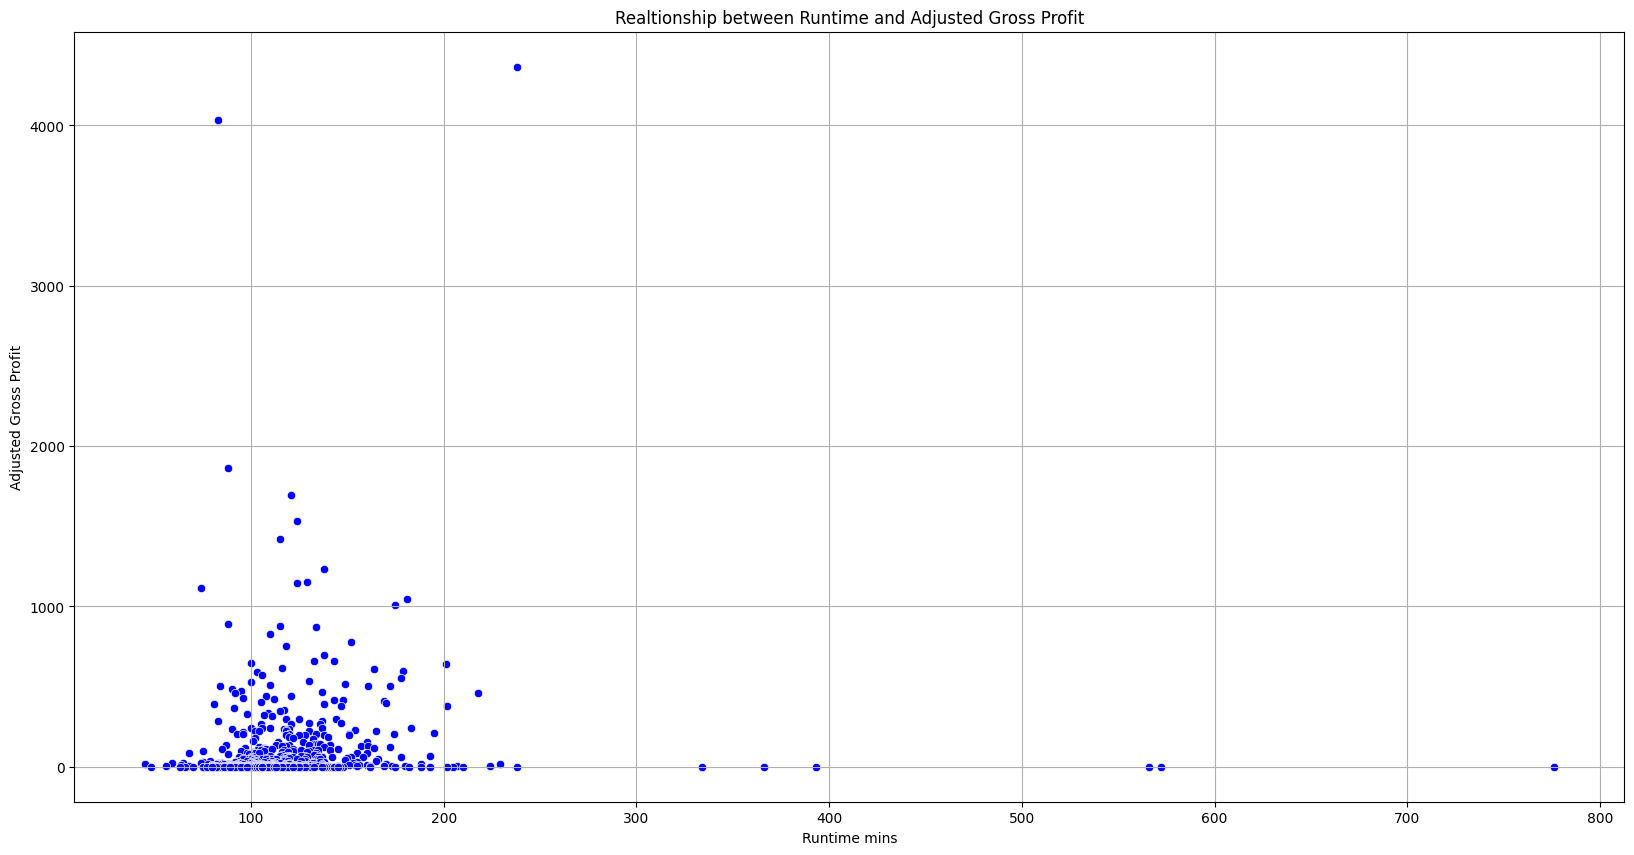

In [60]:
sns.scatterplot(y=profit_df['Adjusted Gross Profit'], x=profit_df['Runtime mins'], color='blue', marker='o')
plt.title('Realtionship between Runtime and Adjusted Gross Profit')
plt.ylabel('Adjusted Gross Profit')
plt.xlabel('Runtime mins')
plt.grid(True)
plt.show()

Removing outliers

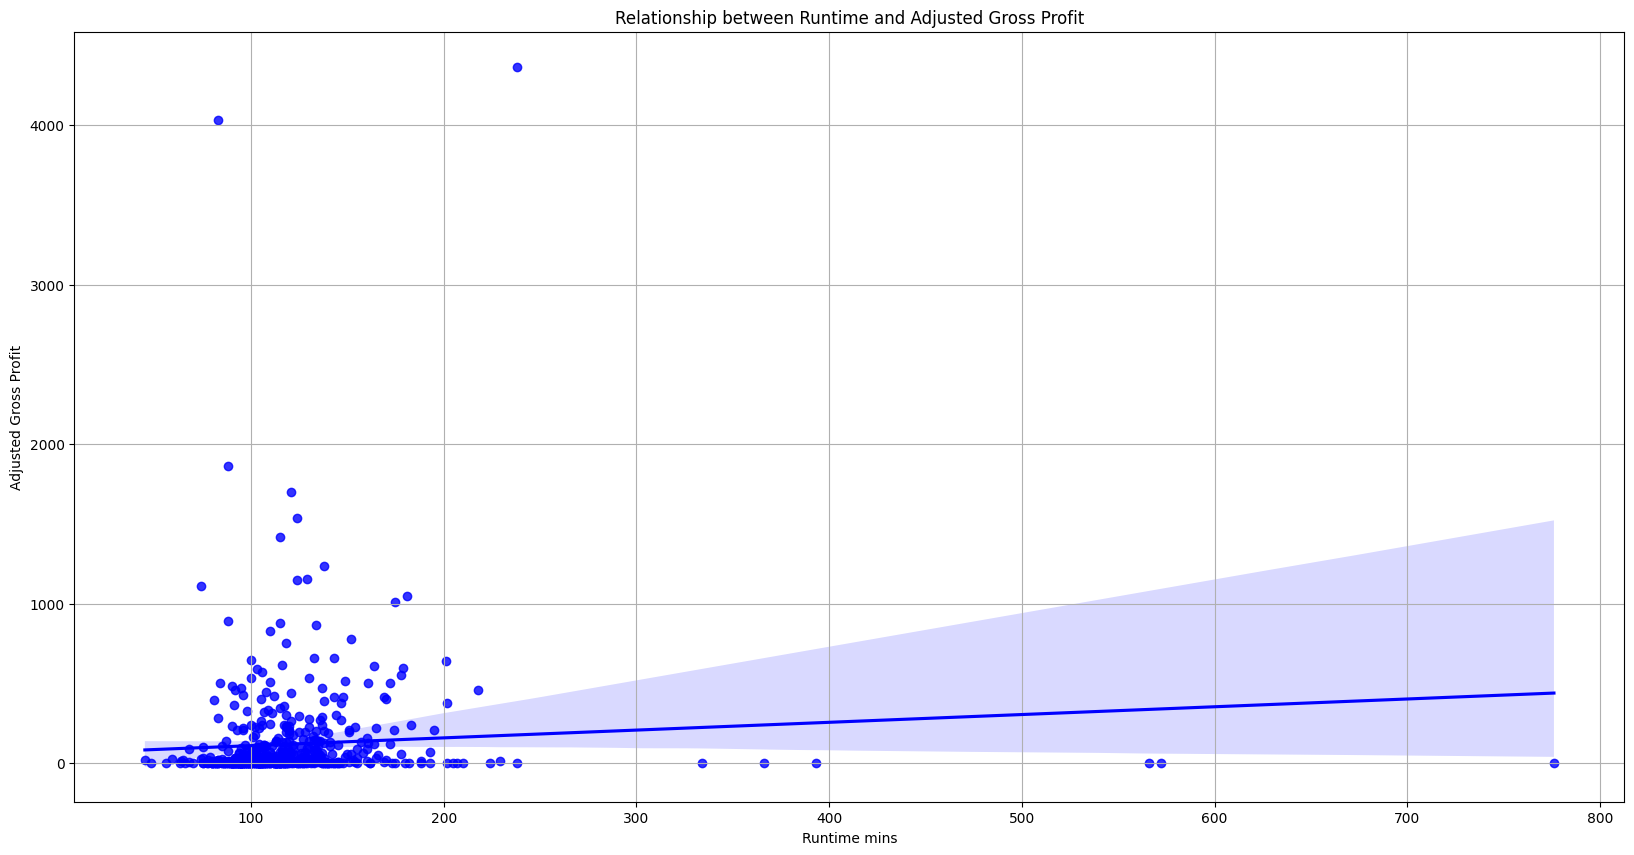

In [61]:
sns.regplot(data=profit_df_no_outliers, y=profit_df_no_outliers['Adjusted Gross Profit'], x=profit_df_no_outliers['Runtime mins'], color='blue', marker='o')
plt.title('Relationship between Runtime and Adjusted Gross Profit')
plt.ylabel('Adjusted Gross Profit')
plt.xlabel('Runtime mins')
plt.grid(True)
plt.show()

Removing runtime mins outliers

In [62]:
profit_df = profit_df.sort_values(by='Runtime mins', ascending=False)
profit_df.head(6)

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit,Decade
813,Out 1,1971,Not Rated,776,"Drama, Mystery",7.5,0.03,0.23,1970
7,The Decalogue,1989,TV-MA,572,Drama,9.0,0.10,0.25,1980
17,Shoah,1985,Not Rated,566,"Documentary, History, War",8.7,0.02,0.06,1980
99,War and Peace,1965,GP,393,"Drama, Romance, War",8.3,0.13,1.28,1960
47,The Best of Youth,2003,R,366,"Drama, Romance",8.5,0.27,0.46,2000
687,Carlos,2010,Not Rated,334,"Biography, Crime, Drama",7.6,0.15,0.21,2010


In [63]:
profit_df_no_outliers = profit_df.drop([121,663, 806, 7, 17, 97, 47, 698])

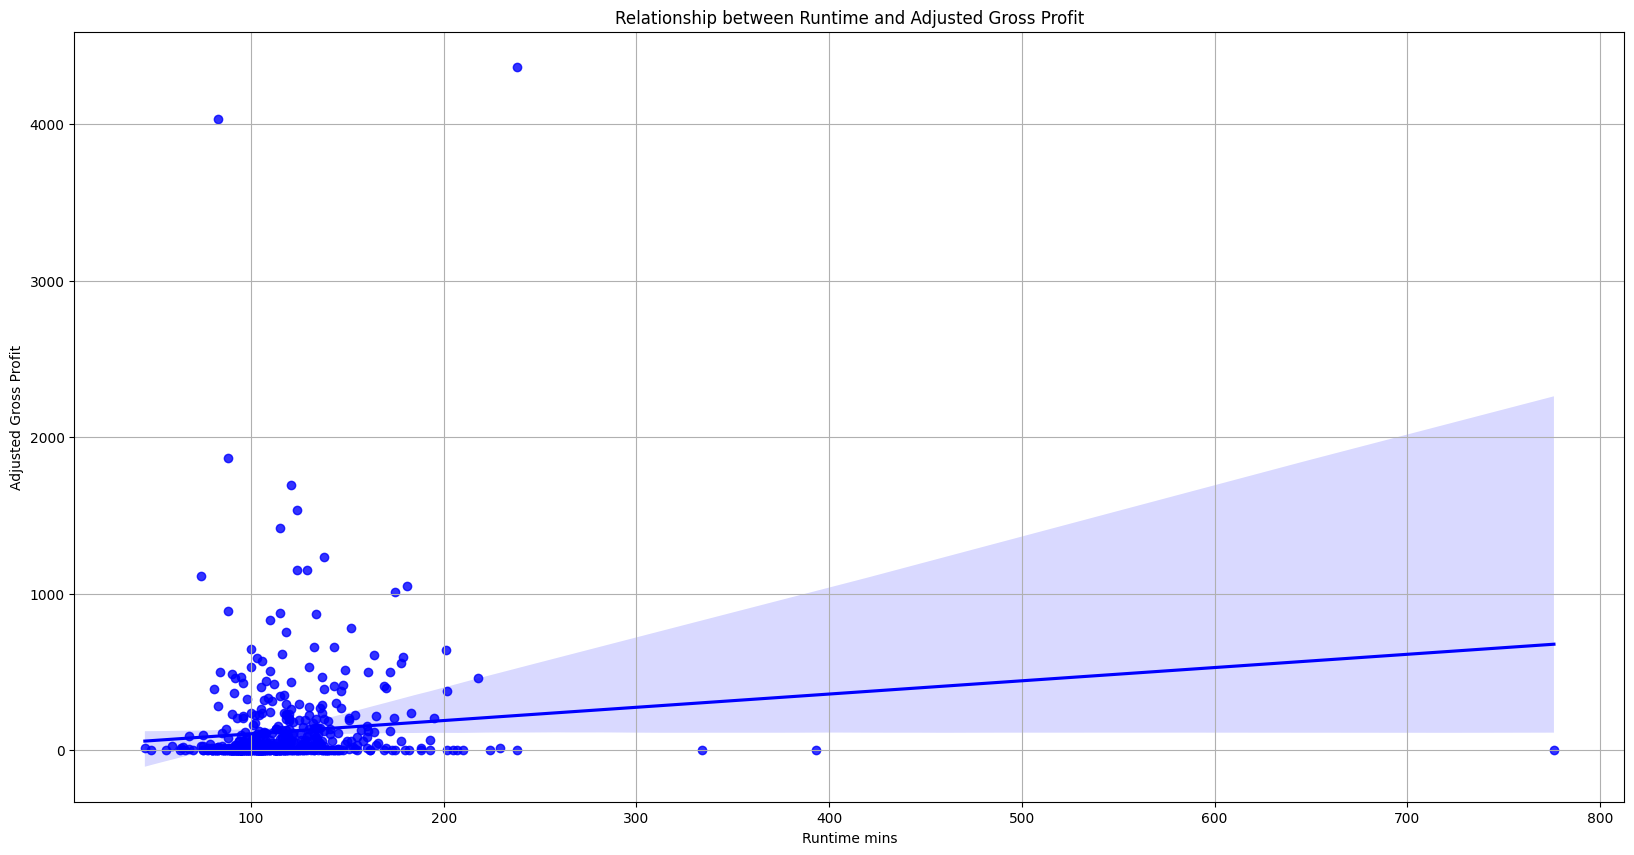

In [64]:
sns.regplot(data=profit_df_no_outliers, y=profit_df_no_outliers['Adjusted Gross Profit'], x=profit_df_no_outliers['Runtime mins'], color='blue', marker='o')
plt.title('Relationship between Runtime and Adjusted Gross Profit')
plt.ylabel('Adjusted Gross Profit')
plt.xlabel('Runtime mins')
plt.grid(True)
plt.show()

Correlation coefficients

In [65]:
selected_columns = ['Adjusted Gross Profit', 'Runtime mins']
profit_df_no_outliers[selected_columns].corr()

,Adjusted Gross Profit,Runtime mins
Adjusted Gross Profit,1.0000,0.1076
Runtime mins,0.1076,1.0000


#Runtime and IMDb Ratings

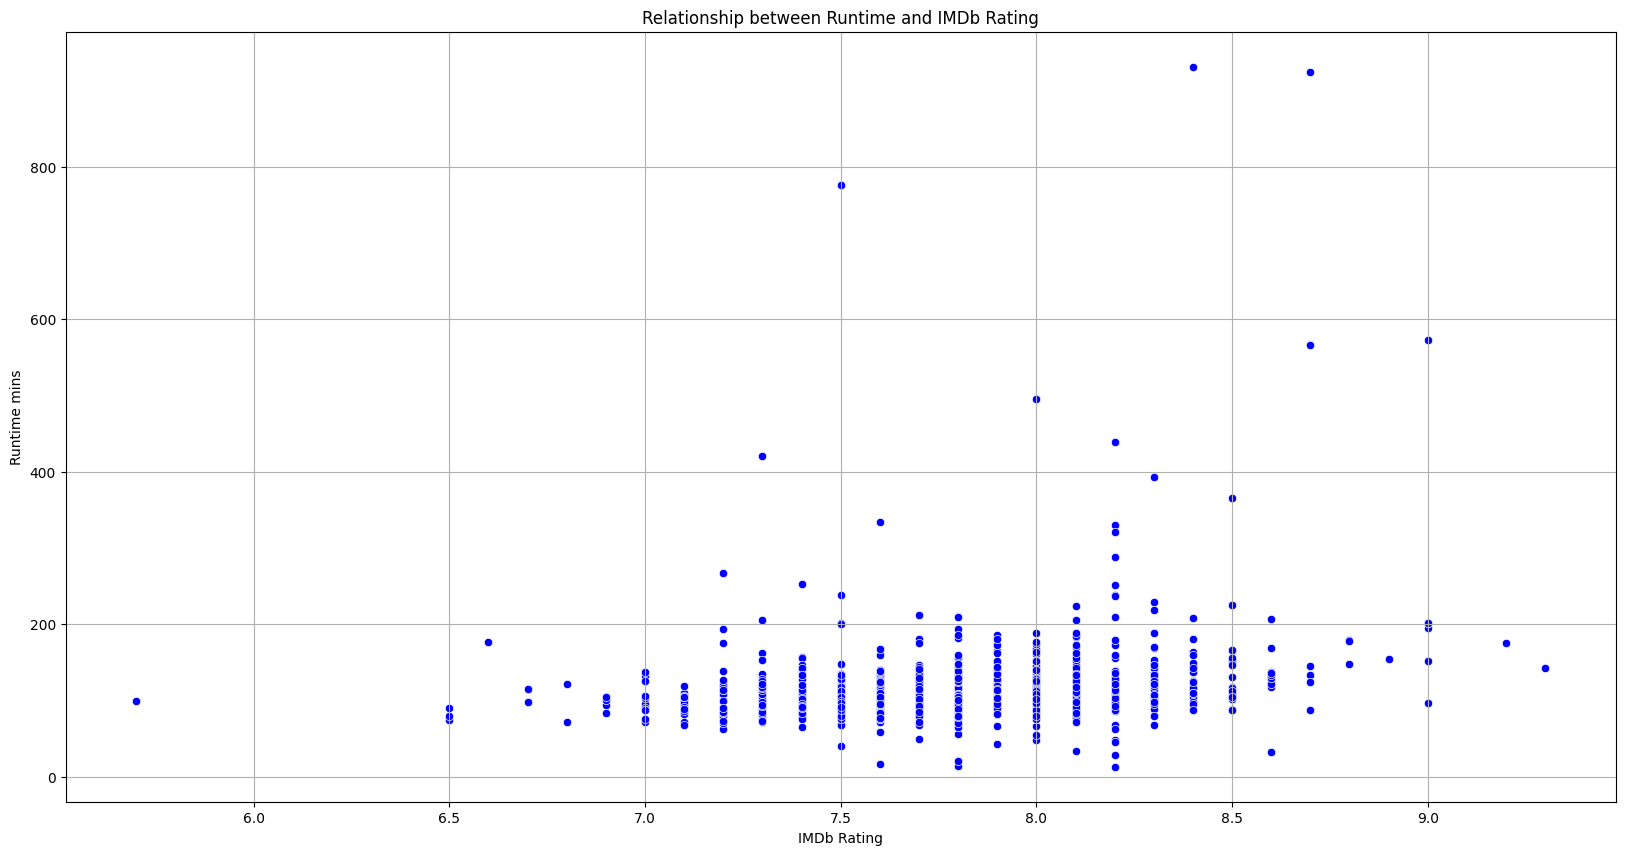

In [66]:
sns.scatterplot(x=top_1000_films['IMDb Rating'], y=top_1000_films['Runtime mins'], color='blue', marker='o')
plt.title('Relationship between Runtime and IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Runtime mins')
plt.grid(True)
plt.show()

In [67]:
top_1000_films = top_1000_films.sort_values(by='Runtime mins', ascending=False)
top_1000_films.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit,Decade
73,Berlin Alexanderplatz,1980,Not Rated,931,"Crime, Drama",8.4,NaN,NaN,1980
18,Heimat: A Chronicle of Germany,1984,None,924,"Drama, History, War",8.7,NaN,NaN,1980
813,Out 1,1971,Not Rated,776,"Drama, Mystery",7.5,0.03,0.23,1970
7,The Decalogue,1989,TV-MA,572,Drama,9.0,0.10,0.25,1980
17,Shoah,1985,Not Rated,566,"Documentary, History, War",8.7,0.02,0.06,1980


In [68]:
top_1000_films = top_1000_films.sort_values(by='IMDb Rating', ascending=False)
top_1000_films.tail()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit,Decade
995,Hard to Be a God,2013,Not Rated,177,"Drama, Sci-Fi",6.6,NaN,NaN,2010
997,The Wandering Soap Opera,2017,None,80,"Comedy, Drama, Fantasy",6.5,0.0,0.0,2010
998,Gavagai,2016,None,90,Drama,6.5,NaN,NaN,2010
996,David Holzman's Diary,1967,Not Rated,74,"Comedy, Drama",6.5,NaN,NaN,1960
999,The Big Sleep,1978,R,99,"Crime, Drama, Mystery",5.7,NaN,NaN,1970


In [69]:
top_1000_films_no_outliers = top_1000_films.drop([74, 18, 806, 999])

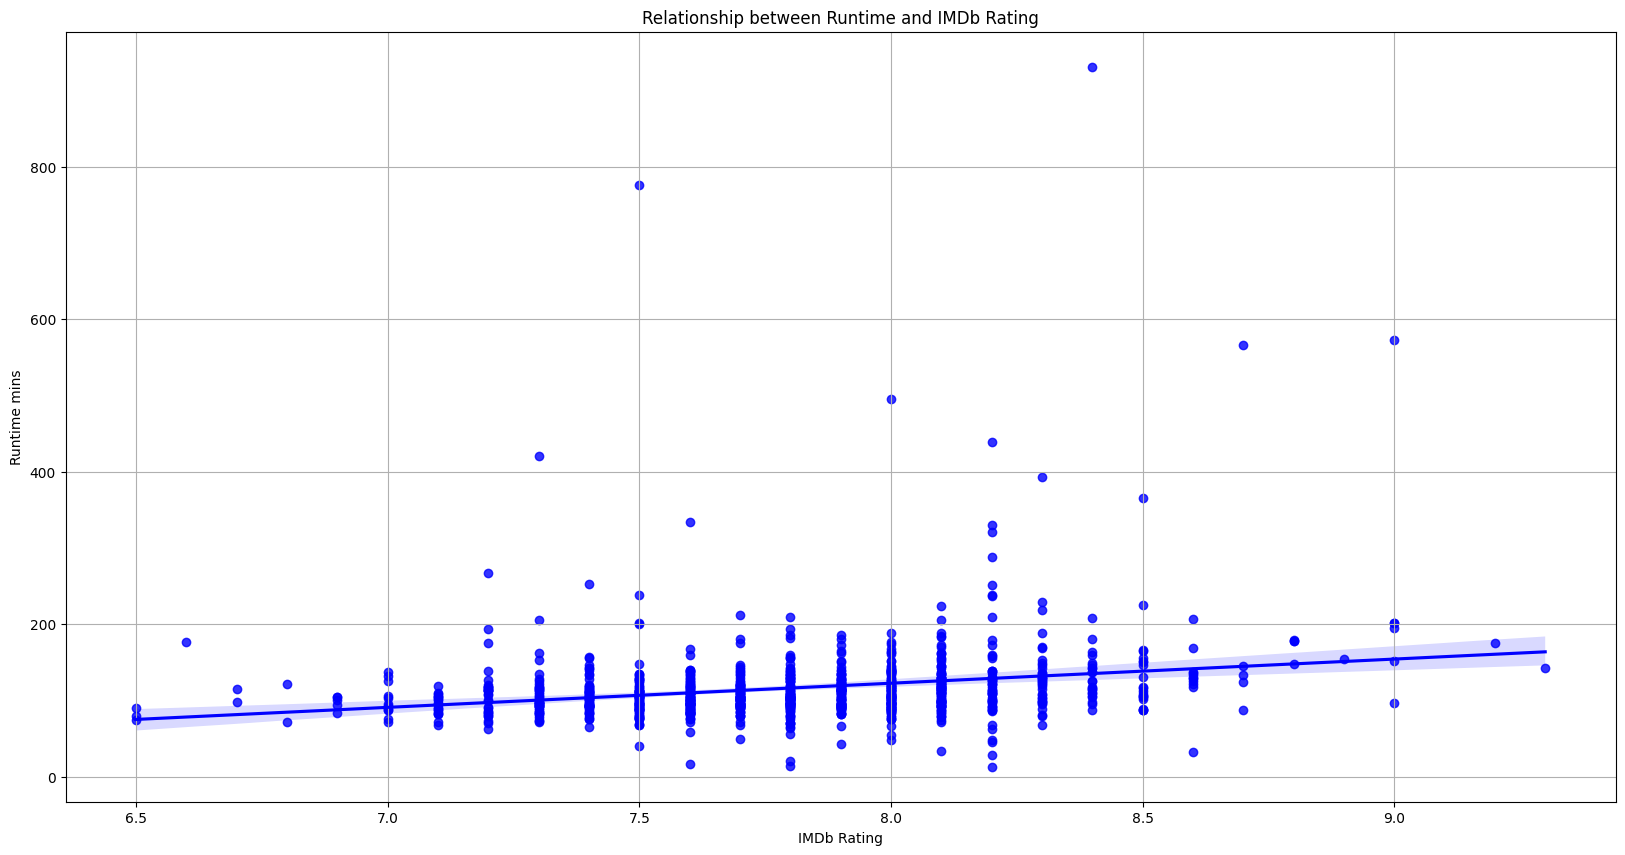

In [70]:
sns.regplot(x=top_1000_films_no_outliers['IMDb Rating'], y=top_1000_films_no_outliers['Runtime mins'], color='blue', marker='o')
plt.title('Relationship between Runtime and IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Runtime mins')
plt.grid(True)
plt.show()

Correlation coefficients

In [71]:
selected_columns = ['Runtime mins', 'IMDb Rating']
top_1000_films_no_outliers[selected_columns].corr()

,Runtime mins,IMDb Rating
Runtime mins,1.000000,0.223904
IMDb Rating,0.223904,1.000000


#Relationship Between Age Rating and IMDb Rating/Gross Profit

#Age Rating and IMDb Rating

In [72]:
age_rating_df['Age Rating'].unique()

array(['R', 'PG-13', 'Approved', 'TV-MA', 'PG', 'Not Rated', 'G',
       'Passed', 'GP', 'TV-G', 'M/PG', 'Unrated', 'TV-PG', 'TV-14',
       'NC-17'], dtype=object)

In [73]:
age_rating_df['Age Rating'].value_counts()

Not Rated    350
R            198
PG           102
Passed        87
PG-13         76
Approved      58
G             29
Unrated        9
TV-MA          8
GP             7
TV-PG          5
TV-14          5
TV-G           1
M/PG           1
NC-17          1
Name: Age Rating, dtype: int64

In [74]:
age_rating_IMDb_df = age_rating_df.groupby('Age Rating')[['IMDb Rating']].mean().round(1).sort_values('IMDb Rating', ascending=False)
age_rating_IMDb_df['Count'] = age_rating_df['Age Rating'].value_counts()
age_rating_IMDb_df = age_rating_IMDb_df[age_rating_IMDb_df['Count'] > 10]
age_rating_IMDb_df.reset_index(inplace=True)
age_rating_IMDb_df['Rank'] = age_rating_IMDb_df.index + 1
age_rating_IMDb_df = age_rating_IMDb_df[['Rank', 'Age Rating', 'Count', 'IMDb Rating']]
age_rating_IMDb_df

,Rank,Age Rating,Count,IMDb Rating
0,1,G,29,8.0
1,2,PG,102,7.9
2,3,Approved,58,7.8
3,4,Not Rated,350,7.8
4,5,PG-13,76,7.8
5,6,R,198,7.8
6,7,Passed,87,7.7


#Age Rating and Gross Profit

In [75]:
age_ratings_profit_df = age_rating_df.groupby('Age Rating')[['Adjusted Gross Profit']].mean().round(1).sort_values('Adjusted Gross Profit', ascending=False)
age_ratings_profit_df['Count'] = age_rating_df['Age Rating'].value_counts()
age_ratings_profit_df = age_ratings_profit_df[age_ratings_profit_df['Count'] > 10]
age_ratings_profit_df.reset_index(inplace=True)
age_ratings_profit_df['Rank'] = age_ratings_profit_df.index + 1
age_ratings_profit_df = age_ratings_profit_df[['Rank', 'Age Rating', 'Count', 'Adjusted Gross Profit']]
age_ratings_profit_df

,Rank,Age Rating,Count,Adjusted Gross Profit
0,1,Approved,58,371.8
1,2,G,29,343.0
2,3,PG,102,217.3
3,4,PG-13,76,182.2
4,5,Passed,87,179.3
5,6,R,198,73.6
6,7,Not Rated,350,13.8


Age Rating and Gross Profit/IMDb Rating metric

In [76]:
age_rating_metric_df = age_rating_df.groupby('Age Rating')[['Adjusted Gross Profit', 'IMDb Rating']].mean().round(1)
age_rating_metric_df['Count'] = age_rating_df['Age Rating'].value_counts()
age_rating_metric_df = age_rating_metric_df[age_rating_metric_df['Count'] > 10]
age_rating_metric_df['Profit/IMDb Rating Metric'] = (age_rating_metric_df['Adjusted Gross Profit'] * age_rating_metric_df['IMDb Rating']) / 1000
age_rating_metric_df.sort_values('Profit/IMDb Rating Metric', ascending=False, inplace=True)
age_rating_metric_df.reset_index(inplace=True)
age_rating_metric_df['Rank'] = age_rating_metric_df.index + 1
age_rating_metric_df = age_rating_metric_df[['Rank', 'Age Rating', 'Count', 'Adjusted Gross Profit', 'IMDb Rating', 'Profit/IMDb Rating Metric']]
age_rating_metric_df

,Rank,Age Rating,Count,Adjusted Gross Profit,IMDb Rating,Profit/IMDb Rating Metric
0,1,Approved,58,371.8,7.8,2.90004
1,2,G,29,343.0,8.0,2.74400
2,3,PG,102,217.3,7.9,1.71667
3,4,PG-13,76,182.2,7.8,1.42116
4,5,Passed,87,179.3,7.7,1.38061
5,6,R,198,73.6,7.8,0.57408
6,7,Not Rated,350,13.8,7.8,0.10764


#Analysing Genre

In [77]:
top_1000_films['Genres'].unique()

array(['Drama', 'Crime, Drama', 'Action, Adventure, Drama',
       'Biography, Drama, History', 'Action, Crime, Drama',
       'Action, Adventure, Sci-Fi', 'Adventure, Western',
       'Documentary, Music', 'Drama, History, War',
       'Documentary, History, War', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Crime, Drama, Thriller',
       'Drama, War', 'Action, Drama', 'Action, Sci-Fi',
       'Drama, Family, Fantasy', 'Comedy, Drama, Sci-Fi',
       'Animation, Adventure, Family', 'Documentary, Short, History',
       'Action, Drama, Mystery', 'Horror, Sci-Fi', 'Drama, Romance',
       'Adventure, Comedy, Sci-Fi', 'Mystery, Thriller',
       'Horror, Mystery, Thriller', 'Drama, Music',
       'Crime, Drama, Mystery', 'Drama, Romance, War', 'Drama, Western',
       'Documentary, Biography, History', 'Biography, Drama, Music',
       'Comedy, Drama, Romance', 'Drama, Thriller',
       'Animation, Drama, War', 'Western', 'Animation, Adventure, Drama',
       'Drama,

In [78]:
'Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History', 'Sci-Fi', 'Western', 'Fantasy',
'War', 'Documentary', 'Music', 'Thriller', 'Comedy', 'Romance', 'Mystery', 'Animation', 'Family',
'Short', 'Film-Noir', 'Horror', 'Sport', 'Musical', 'None'

('Short', 'Film-Noir', 'Horror', 'Sport', 'Musical', 'None')

In [79]:
top_1000_films.head(10)

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit,Decade
0,The Shawshank Redemption,1994,R,142,Drama,9.3,28.34,59.64,1990
1,The Godfather,1972,R,175,"Crime, Drama",9.2,134.97,1010.37,1970
5,12 Angry Men,1957,Approved,96,"Crime, Drama",9.0,4.36,48.60,1950
6,The Godfather Part II,1974,R,202,"Crime, Drama",9.0,57.30,378.32,1970
7,The Decalogue,1989,TV-MA,572,Drama,9.0,0.10,0.25,1980
4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,377.85,639.81,2000
3,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,96.90,209.07,1990
2,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,534.86,779.61,2000
8,Pulp Fiction,1994,R,154,"Crime, Drama",8.9,107.93,227.13,1990
10,Inception,2010,PG-13,148,"Action, Adventure, Sci-Fi",8.8,292.58,415.43,2010


Splitting genres into new Dataframe

In [80]:
df_genres = top_1000_films['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre').to_frame()

df_film_genre = pd.merge(top_1000_films[['Movie Title']], df_genres, left_index=True, right_index=True, how='right')

films_df_by_genre = pd.merge(top_1000_films, df_film_genre, left_on='Movie Title', right_on='Movie Title', how='left')

films_df_by_genre.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit,Decade,Genre
0,The Shawshank Redemption,1994,R,142,Drama,9.3,28.34,59.64,1990,Drama
1,The Godfather,1972,R,175,"Crime, Drama",9.2,134.97,1010.37,1970,Crime
2,The Godfather,1972,R,175,"Crime, Drama",9.2,134.97,1010.37,1970,Drama
3,12 Angry Men,1957,Approved,96,"Crime, Drama",9.0,4.36,48.60,1950,Crime
4,12 Angry Men,1957,Approved,96,"Crime, Drama",9.0,4.36,48.60,1950,Drama


In [81]:
films_df_by_genre.shape

(2314, 10)

Analysis

In [82]:
films_df_by_genre['Genre'].value_counts()

Drama          764
Comedy         236
Romance        195
Crime          161
Adventure      109
Thriller        91
Action          75
Mystery         74
War             74
History         69
Documentary     68
Biography       67
Animation       44
Sci-Fi          40
Music           40
Film-Noir       37
Fantasy         37
Horror          33
Family          30
Western         29
Musical         18
Sport           13
Short            9
Name: Genre, dtype: int64

#Genre and IMDb Rating

In [83]:
genre_df = films_df_by_genre.groupby('Genre')[['IMDb Rating']].mean().round(1).sort_values('IMDb Rating', ascending=False)
genre_df['Count'] = films_df_by_genre['Genre'].value_counts()
genre_df.reset_index(inplace=True)
genre_df['Rank'] = genre_df.index + 1
genre_df = genre_df[['Rank', 'Genre', 'Count', 'IMDb Rating']]
genre_df.head()

,Rank,Genre,Count,IMDb Rating
0,1,Animation,44,8.0
1,2,War,74,8.0
2,3,Short,9,8.0
3,4,Action,75,7.9
4,5,Music,40,7.9


#Genre and Gross Profit

In [84]:
genre_df_profit = films_df_by_genre.groupby('Genre')[['Adjusted Gross Profit']].mean().round(1).sort_values('Adjusted Gross Profit', ascending=False)
genre_df_profit['Count'] = films_df_by_genre['Genre'].value_counts()
genre_df_profit.reset_index(inplace=True)
genre_df_profit['Rank'] = genre_df_profit.index + 1
genre_df_profit = genre_df_profit[['Rank', 'Genre', 'Count', 'Adjusted Gross Profit']]
genre_df_profit.head()

,Rank,Genre,Count,Adjusted Gross Profit
0,1,Family,30,416.6
1,2,Adventure,109,415.6
2,3,Animation,44,408.9
3,4,Action,75,357.0
4,5,Sci-Fi,40,299.6


#Using IMDb Rating/Gross Profit Metric

In [85]:
genre_metric_df = films_df_by_genre.groupby('Genre')[['Adjusted Gross Profit', 'IMDb Rating']].mean().round(1)
genre_metric_df['Count'] = films_df_by_genre['Genre'].value_counts()
genre_metric_df['Profit/IMDb Rating Metric'] = (genre_metric_df['Adjusted Gross Profit'] * genre_metric_df['IMDb Rating']) / 1000
genre_metric_df.sort_values('Profit/IMDb Rating Metric', ascending=False, inplace=True)
genre_metric_df.reset_index(inplace=True)
genre_metric_df['Rank'] = genre_metric_df.index + 1
genre_metric_df = genre_metric_df[['Rank', 'Genre', 'Count', 'Adjusted Gross Profit', 'IMDb Rating', 'Profit/IMDb Rating Metric']]
genre_metric_df.head(10)

,Rank,Genre,Count,Adjusted Gross Profit,IMDb Rating,Profit/IMDb Rating Metric
0,1,Family,30,416.6,7.9,3.29114
1,2,Adventure,109,415.6,7.9,3.28324
2,3,Animation,44,408.9,8.0,3.27120
3,4,Action,75,357.0,7.9,2.82030
4,5,Sci-Fi,40,299.6,7.9,2.36684
5,6,Fantasy,37,281.8,7.8,2.19804
6,7,War,74,199.7,8.0,1.59760
7,8,Thriller,91,113.3,7.9,0.89507
8,9,Comedy,236,113.2,7.7,0.87164
9,10,Mystery,74,105.8,7.8,0.82524


In [86]:
genre_metric_df.tail(10)

,Rank,Genre,Count,Adjusted Gross Profit,IMDb Rating,Profit/IMDb Rating Metric
13,14,Crime,161,81.3,7.8,0.63414
14,15,Drama,764,80.9,7.8,0.63102
15,16,Biography,67,74.9,7.8,0.58422
16,17,Musical,18,73.1,7.6,0.55556
17,18,Film-Noir,37,67.2,7.8,0.52416
18,19,History,69,55.5,7.8,0.43290
19,20,Sport,13,54.5,7.8,0.42510
20,21,Music,40,44.9,7.9,0.35471
21,22,Documentary,68,3.8,7.9,0.03002
22,23,Short,9,NaN,8.0,NaN


#Best Combination of Genre

In [87]:
top_1000_films['Genre Pair'] = top_1000_films['Genres'].str.split(', ').apply(lambda x: ', '.join(x[:2]) if x else None)
top_1000_films.head()

,Movie Title,Year,Age Rating,Runtime mins,Genres,IMDb Rating,Gross Profit Millions,Adjusted Gross Profit,Decade,Genre Pair
0,The Shawshank Redemption,1994,R,142,Drama,9.3,28.34,59.64,1990,Drama
1,The Godfather,1972,R,175,"Crime, Drama",9.2,134.97,1010.37,1970,"Crime, Drama"
5,12 Angry Men,1957,Approved,96,"Crime, Drama",9.0,4.36,48.60,1950,"Crime, Drama"
6,The Godfather Part II,1974,R,202,"Crime, Drama",9.0,57.30,378.32,1970,"Crime, Drama"
7,The Decalogue,1989,TV-MA,572,Drama,9.0,0.10,0.25,1980,Drama


#Genre Pair and IMDb Rating

In [88]:
genre_pair_df = top_1000_films.groupby('Genre Pair')[['IMDb Rating']].mean().round(1).sort_values('IMDb Rating', ascending=False)
genre_pair_df['Count'] = top_1000_films['Genre Pair'].value_counts()
genre_pair_df = genre_pair_df[genre_pair_df['Count'] > 10]
genre_pair_df.reset_index(inplace=True)
genre_pair_df['Rank'] = genre_pair_df.index + 1
genre_pair_df = genre_pair_df[['Rank', 'Genre Pair', 'Count', 'IMDb Rating']]
genre_pair_df.head(10)

,Rank,Genre Pair,Count,IMDb Rating
0,1,"Documentary, History",11,8.1
1,2,"Documentary, Biography",12,8.0
2,3,"Action, Adventure",34,8.0
3,4,"Action, Drama",15,8.0
4,5,"Animation, Adventure",24,8.0
5,6,"Drama, Mystery",23,7.9
6,7,"Adventure, Comedy",14,7.9
7,8,"Drama, War",29,7.9
8,9,"Drama, Fantasy",13,7.9
9,10,"Drama, Film-Noir",11,7.9


#Genre Pair and Gross Profit

In [89]:
genre_pair_df_profit = top_1000_films.groupby('Genre Pair')[['Adjusted Gross Profit']].mean().round(1).sort_values('Adjusted Gross Profit', ascending=False)
genre_pair_df_profit['Count'] = top_1000_films['Genre Pair'].value_counts()
genre_pair_df_profit = genre_pair_df_profit[genre_pair_df_profit['Count'] > 10]
genre_pair_df_profit.reset_index(inplace=True)
genre_pair_df_profit['Rank'] = genre_pair_df_profit.index + 1
genre_pair_df_profit = genre_pair_df_profit[['Rank', 'Genre Pair', 'Count', 'Adjusted Gross Profit']]
genre_pair_df_profit.head(10)

,Rank,Genre Pair,Count,Adjusted Gross Profit
0,1,"Animation, Adventure",24,558.3
1,2,"Action, Adventure",34,503.7
2,3,"Action, Drama",15,173.9
3,4,"Adventure, Drama",18,158.0
4,5,"Comedy, Crime",19,153.3
5,6,Comedy,17,148.4
6,7,"Drama, Romance",89,137.9
7,8,"Drama, Western",15,127.8
8,9,"Adventure, Comedy",14,106.2
9,10,"Comedy, Musical",11,102.7


#IMDb Rating/Gross Profit Metric

In [90]:
genre_pair_metric_df = top_1000_films.groupby('Genre Pair')[['Adjusted Gross Profit', 'IMDb Rating']].mean().round(1)
genre_pair_metric_df['Count'] = top_1000_films['Genre Pair'].value_counts()
genre_pair_metric_df = genre_pair_metric_df[genre_pair_metric_df['Count'] > 10]
genre_pair_metric_df['Profit/IMDb Rating Metric'] = (genre_pair_metric_df['Adjusted Gross Profit'] * genre_pair_metric_df['IMDb Rating']) / 1000
genre_pair_metric_df.sort_values('Profit/IMDb Rating Metric', ascending=False, inplace=True)
genre_pair_metric_df.reset_index(inplace=True)
genre_pair_metric_df['Rank'] = genre_pair_metric_df.index + 1
genre_pair_metric_df = genre_pair_metric_df[['Rank', 'Genre Pair', 'Count', 'Adjusted Gross Profit', 'IMDb Rating', 'Profit/IMDb Rating Metric']]
genre_pair_metric_df.head(10)

,Rank,Genre Pair,Count,Adjusted Gross Profit,IMDb Rating,Profit/IMDb Rating Metric
0,1,"Animation, Adventure",24,558.3,8.0,4.46640
1,2,"Action, Adventure",34,503.7,8.0,4.02960
2,3,"Action, Drama",15,173.9,8.0,1.39120
3,4,"Adventure, Drama",18,158.0,7.7,1.21660
4,5,"Comedy, Crime",19,153.3,7.7,1.18041
5,6,Comedy,17,148.4,7.5,1.11300
6,7,"Drama, Romance",89,137.9,7.8,1.07562
7,8,"Drama, Western",15,127.8,7.8,0.99684
8,9,"Adventure, Comedy",14,106.2,7.9,0.83898
9,10,"Comedy, Musical",11,102.7,7.5,0.77025


#Film Recommender

In [91]:
top_1000_films.columns

Index(['Movie Title', 'Year', 'Age Rating', 'Runtime mins', 'Genres',
       'IMDb Rating', 'Gross Profit Millions', 'Adjusted Gross Profit',
       'Decade', 'Genre Pair'],
      dtype='object')

In [92]:
films_df_by_genre['Genre'].unique()

array(['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History',
       'Sci-Fi', 'Western', 'Documentary', 'Music', 'War', 'Fantasy',
       'Thriller', 'Family', 'Comedy', 'Animation', 'Short', 'Mystery',
       'Horror', 'Romance', 'Film-Noir', 'Musical', 'Sport', nan],
      dtype=object)

In [94]:
import ipywidgets as widgets
from IPython.display import display

choices = ['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History',
       'Sci-Fi', 'Western', 'Documentary', 'Music', 'War', 'Fantasy',
       'Thriller', 'Family', 'Comedy', 'Animation', 'Short', 'Mystery',
       'Horror', 'Romance', 'Film-Noir', 'Musical', 'Sport']

genre_dropdown = widgets.Dropdown(
    options=choices,
    value=choices[0],
    description='Genres: ')

def film_recommender():

  print('Welcome to the Film Recommender\n')
  display(genre_dropdown)
  print()
  genre = input('What Genre/Genres of film are you looking for? E.g. \'Genre1, Genre2\': \n').title()
  user_genres = [g.strip() for g in genre.split(',')]
  print()
  print('What era are you looking for?')
  era_min = int(input('Minimum year: \n'))
  era_max = int(input('Maximum year: \n'))
  print()
  print('How long would you like the film to be?')
  runtime_min = int(input('Minimum runtime (mins): \n'))
  runtime_max = int(input('Maximum runtime (mins): \n'))

  df = top_1000_films[top_1000_films['Genres'].apply(lambda x: x and all(sub_genre
                      in x for sub_genre in user_genres))
                     & (top_1000_films['Year'] >= era_min)
                     & (top_1000_films['Year'] <= era_max)
                     & (top_1000_films['Runtime mins'] >= runtime_min)
                     & (top_1000_films['Runtime mins'] <= runtime_max)].copy()
  df.sort_values(by = 'IMDb Rating', ascending = False, inplace=True)
  df.reset_index(inplace=True)
  df['Rank'] = df.index + 1
  df = df[['Rank', 'Movie Title', 'Year', 'Runtime mins', 'Genres', 'IMDb Rating']]
  df.set_index('Rank', inplace=True)

  print()
  if len(df) == 0:
    print('Apologies! We do not have any films in our database that fit this criteria!')
  elif len(df) == 1:
    print('We only have 1 film in our database that fits this criteria\n')
  else:
    print(f'We have {len(df)} films in our database that fit this criteria')
  if len(df) < 3:
    print(f'Here is the top {len(df)}!\n')
  else:
    print('Here is the top 3!\n')

  movies_left = True
  next_3 = True

  while movies_left:
    while next_3 == True and len(df) > 0:
      display(df.head(3))
      df.drop(index=df.index[:3], inplace=True)
      print()
      yes_no = input('Would you like to see the next 3 films? (Yes/No): \n').lower()
      if yes_no == 'yes':
        pass
      elif yes_no == 'no':
        next_3 = False
      else:
        print('\nInvalid Answer - Programme Terminated!')
        next_3 = False
        movies_left = False
    else:
      if len(df) == 0 and yes_no == 'yes':
        print('\nApologies, that is all the movies we have in this database that fit this criteria!\n')
      else:
        print('\nNo problem!')
      print('\nThank you for using the Movie Recommender')
      movies_left = False


film_recommender()

Welcome to the Film Recommender



Dropdown(description='Genres: ', options=('Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History', 'Sc…


What Genre/Genres of film are you looking for? E.g. 'Genre1, Genre2': 
crime

What era are you looking for?
Minimum year: 
2000
Maximum year: 
2010

How long would you like the film to be?
Minimum runtime (mins): 
120
Maximum runtime (mins): 
180

We have 6 films in our database that fit this criteria
Here is the top 3!



,Movie Title,Year,Runtime mins,Genres,IMDb Rating
Rank,,,,,
1,The Dark Knight,2008,152,"Action, Crime, Drama",9.0
2,City of God,2002,130,"Crime, Drama",8.6
3,The Departed,2006,151,"Crime, Drama, Thriller",8.5


KeyboardInterrupt: ignored